# 선형모델과 트리모델의 비교

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [49]:
from numpy.random import rand, randn
from sklearn.model_selection import train_test_split

In [43]:
N=200
x1 = 4*randn(N) + 173
x2 = 3*randn(N) + 162
y1 = x1 * 1.2 + 4* randn(N) - 130
y2 = x2 * 1.1 + 3* randn(N) - 122

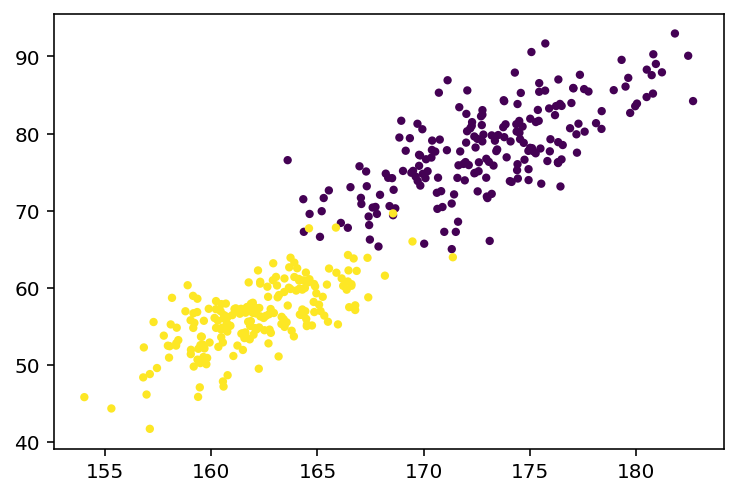

In [44]:
sex = N*[0]+N*[1]
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
data = pd.DataFrame({'height':x, 'weight':y, 'sex':sex})
plt.scatter(x,y,c=sex, s=10)

In [45]:
data

,height,weight,sex
0,172.013647,82.554455,0
1,167.734968,70.492872,0
2,173.798771,79.537104,0
3,172.424459,74.911741,0
4,171.879293,76.065370,0
...,...,...,...
395,160.468512,53.595236,1
396,159.042228,51.968680,1
397,166.778699,57.729450,1
398,164.406573,59.980872,1


In [ ]:
y = data['weight']

In [64]:
# 성별 정보를 사용하는 경우
X = data[['height','sex']]
# 성별을 사용하지 않는 경우
# X = data[['height']]
X

,height,sex
0,172.013647,0
1,167.734968,0
2,173.798771,0
3,172.424459,0
4,171.879293,0
...,...,...
395,160.468512,1
396,159.042228,1
397,166.778699,1
398,164.406573,1


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## 선형 회귀 예측 모델 

In [76]:
# 회귀 모델 세가지 비교
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

lr.fit(X_train, y_train) 
dtr.fit(X_train, y_train) 
rfr.fit(X_train, y_train) 
print('선형모델: ', lr.score(X_test, y_test).round(4))
print('트리모델: ', dtr.score(X_test, y_test).round(4))
print('래덤포레스트: ', rfr.score(X_test, y_test).round(4))

선형모델:  0.933
트리모델:  0.8705
래덤포레스트:  0.9031


In [77]:
lr.coef_, lr.intercept_

(array([ 1.08624783, -9.50107181]), -110.08866696979726)

In [79]:
dtr.feature_importances_, rfr.feature_importances_

(array([0.19248191, 0.80751809]), array([0.20178377, 0.79821623]))

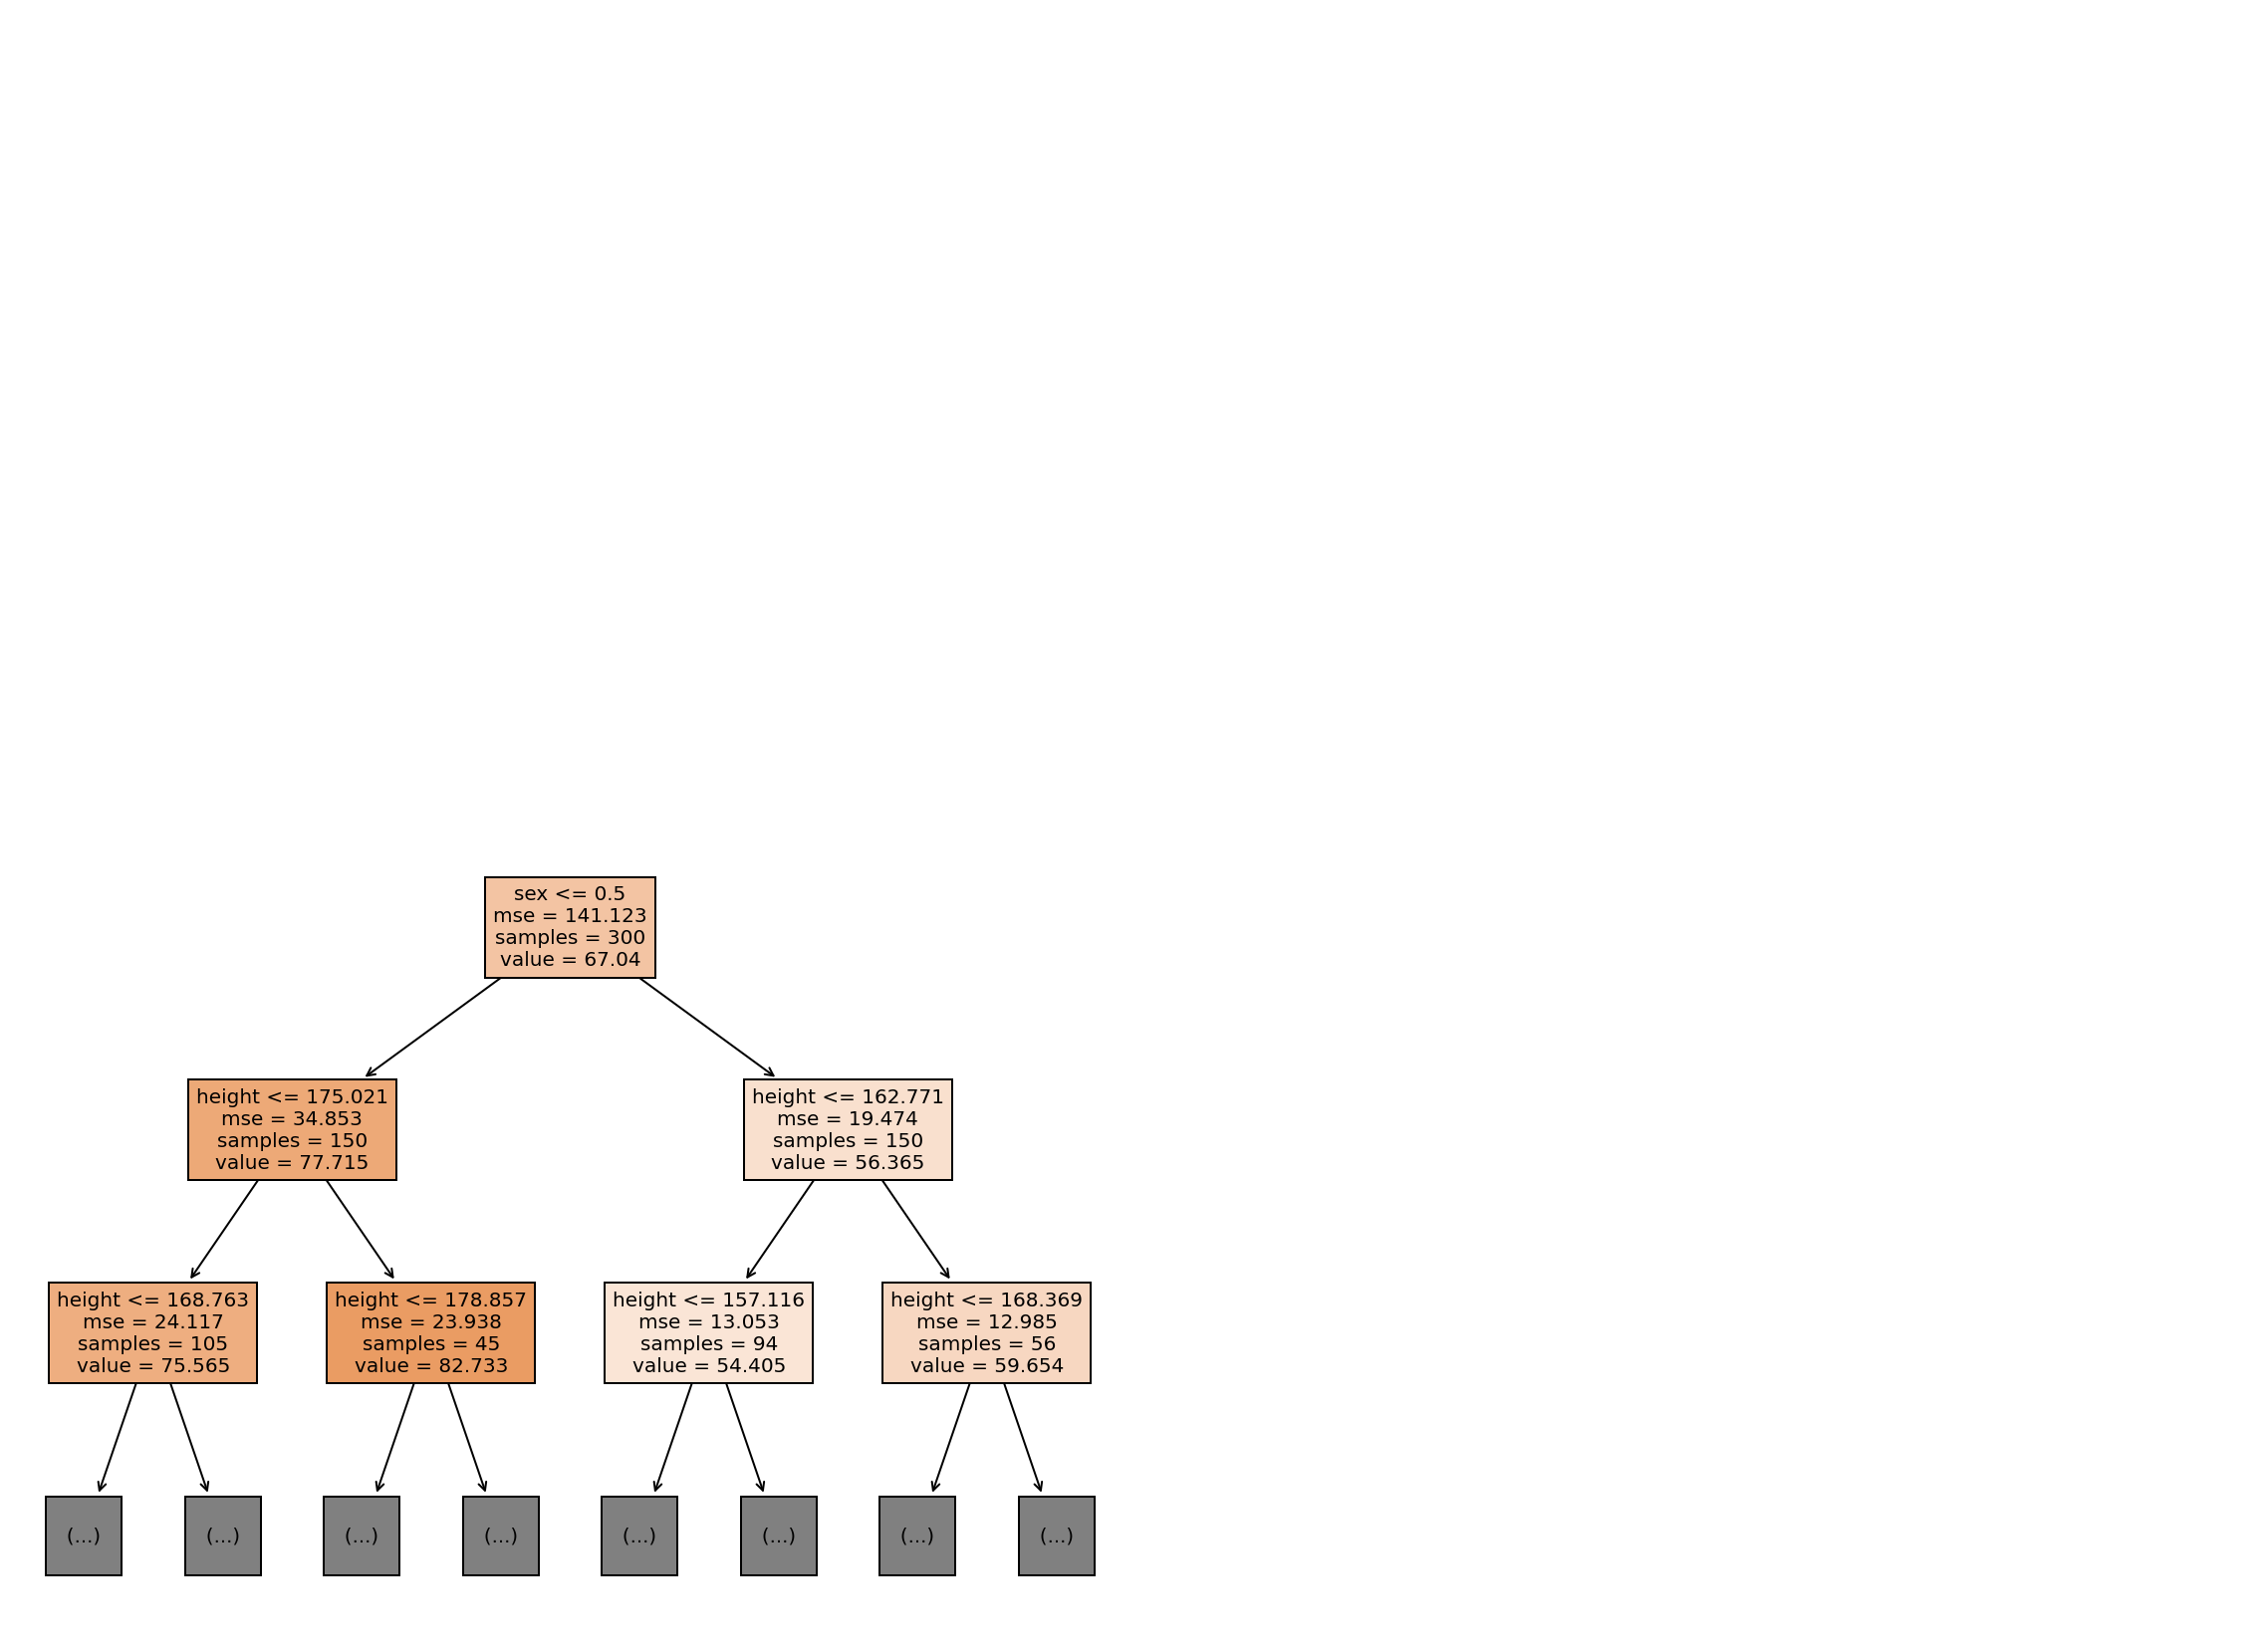

In [81]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(20,15))
tree.plot_tree(dtr, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

In [84]:
from scipy.stats import norm

In [186]:
# foot size
def get_f1(x):
    return 250+ 80*norm().pdf((x-172)/4.0) + randn()
def get_f2(x):
    return 230+ 70*norm().pdf((x-163)/3.0) + randn()

get_f1(175)

273.73546341532

In [126]:
z1 = np.array(list(map(get_f1, x1)))
z2 = np.array(list(map(get_f2, x2)))
z = np.concatenate((z1, z2))
data["foot"] = z
data

,height,weight,sex,foot
0,172.013647,82.554455,0,281.825169
1,167.734968,70.492872,0,268.034911
2,173.798771,79.537104,0,278.561410
3,172.424459,74.911741,0,283.143533
4,171.879293,76.065370,0,283.302730
...,...,...,...,...
395,160.468512,53.595236,1,250.376262
396,159.042228,51.968680,1,243.018771
397,166.778699,57.729450,1,242.427929
398,164.406573,59.980872,1,254.752161


In [151]:
X = data[['height','weight','sex']]
y = data["foot"]

In [192]:
# 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

X.loc[:,['height','weight']] = scaler.fit_transform(X[['height','weight']].copy())
X

/Users/hjk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,height,weight,sex
0,0.692532,1.282349,0
1,0.026202,0.274685,0
2,0.970533,1.030270,0
3,0.756508,0.643852,0
4,0.671608,0.740230,0
...,...,...,...
395,-1.105421,-1.137000,1
396,-1.327540,-1.272888,1
397,-0.122720,-0.791614,1
398,-0.492137,-0.603523,1


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr.fit(X_train, y_train) 
dtr.fit(X_train, y_train) 
rfr.fit(X_train, y_train) 
print('선형모델: ', lr.score(X_test, y_test).round(4))
print('트리모델: ', dtr.score(X_test, y_test).round(4))
print('래덤포레스트: ', rfr.score(X_test, y_test).round(4))

선형모델:  0.651
트리모델:  0.9932
래덤포레스트:  0.9947


In [199]:
foot_s = MinMaxScaler().fit_transform(data.foot.values.reshape(-1,1)).ravel()

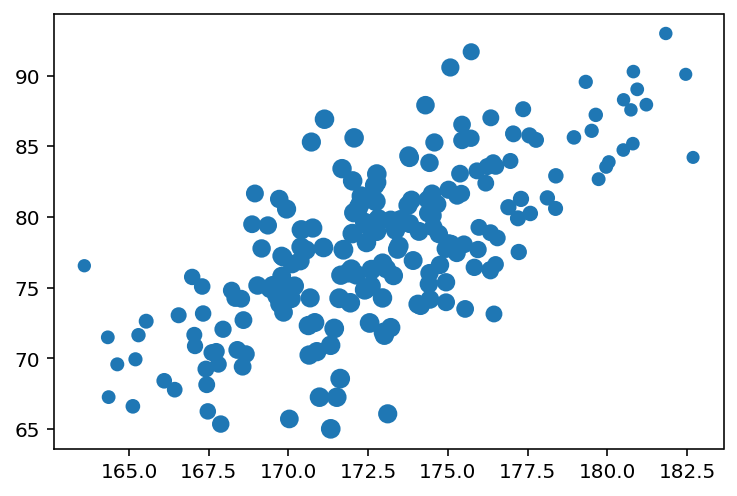

In [207]:
# 남성
plt.scatter(data.height[:200], data.weight[:200],s=foot_s[:200]*80)

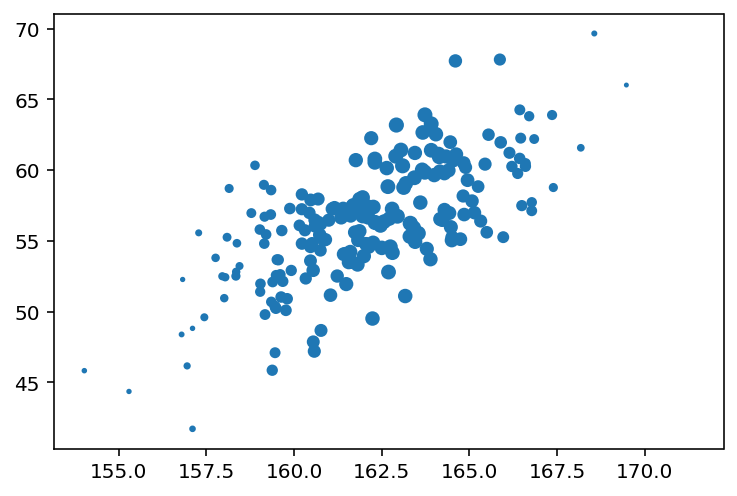

In [208]:
# 여성
plt.scatter(data.height[200:], data.weight[200:],s=foot_s[200:]*80)

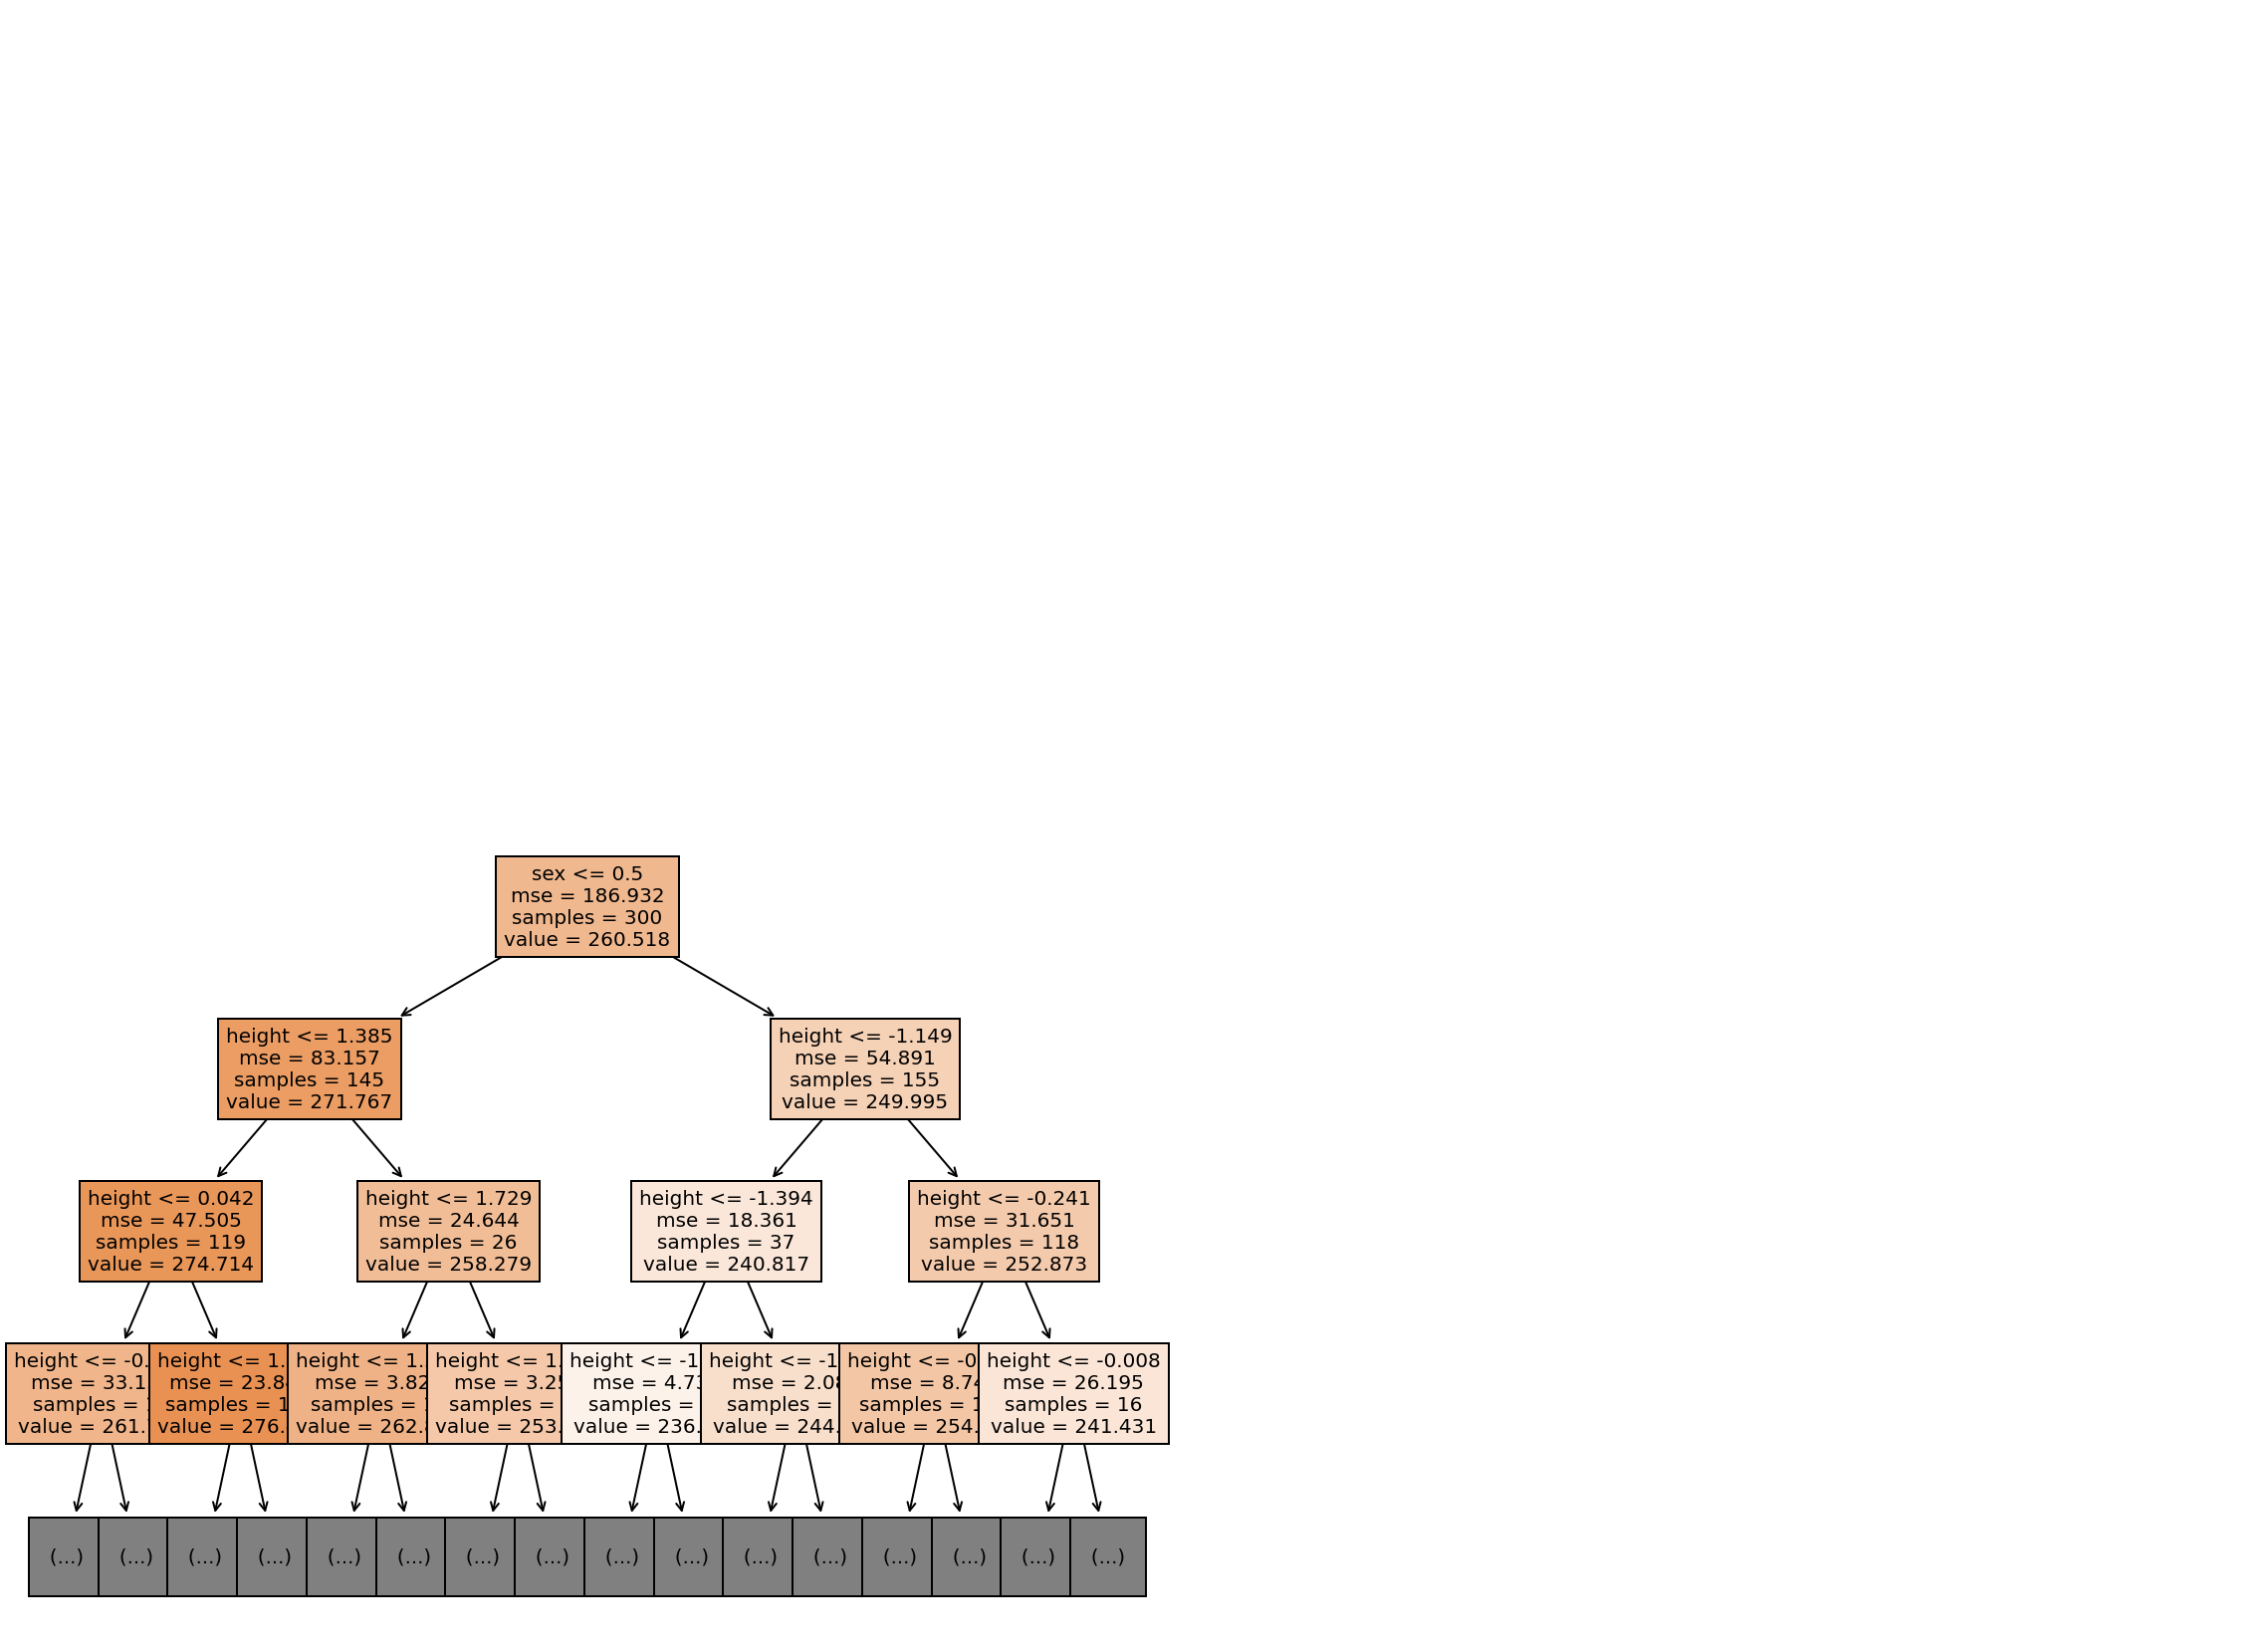

In [210]:
plt.figure(figsize=(20,15))
tree.plot_tree(dtr, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=3)
plt.show()

In [212]:
X

,height,weight,sex
0,0.692532,1.282349,0
1,0.026202,0.274685,0
2,0.970533,1.030270,0
3,0.756508,0.643852,0
4,0.671608,0.740230,0
...,...,...,...
395,-1.105421,-1.137000,1
396,-1.327540,-1.272888,1
397,-0.122720,-0.791614,1
398,-0.492137,-0.603523,1


In [211]:
dtr.feature_importances_, rfr.feature_importances_

(array([0.36429284, 0.00243547, 0.6332717 ]),
 array([0.38766454, 0.02317958, 0.58915588]))